In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [2]:
data = pd.read_csv('housing.csv')
data.dropna(inplace = True)
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


# train data

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

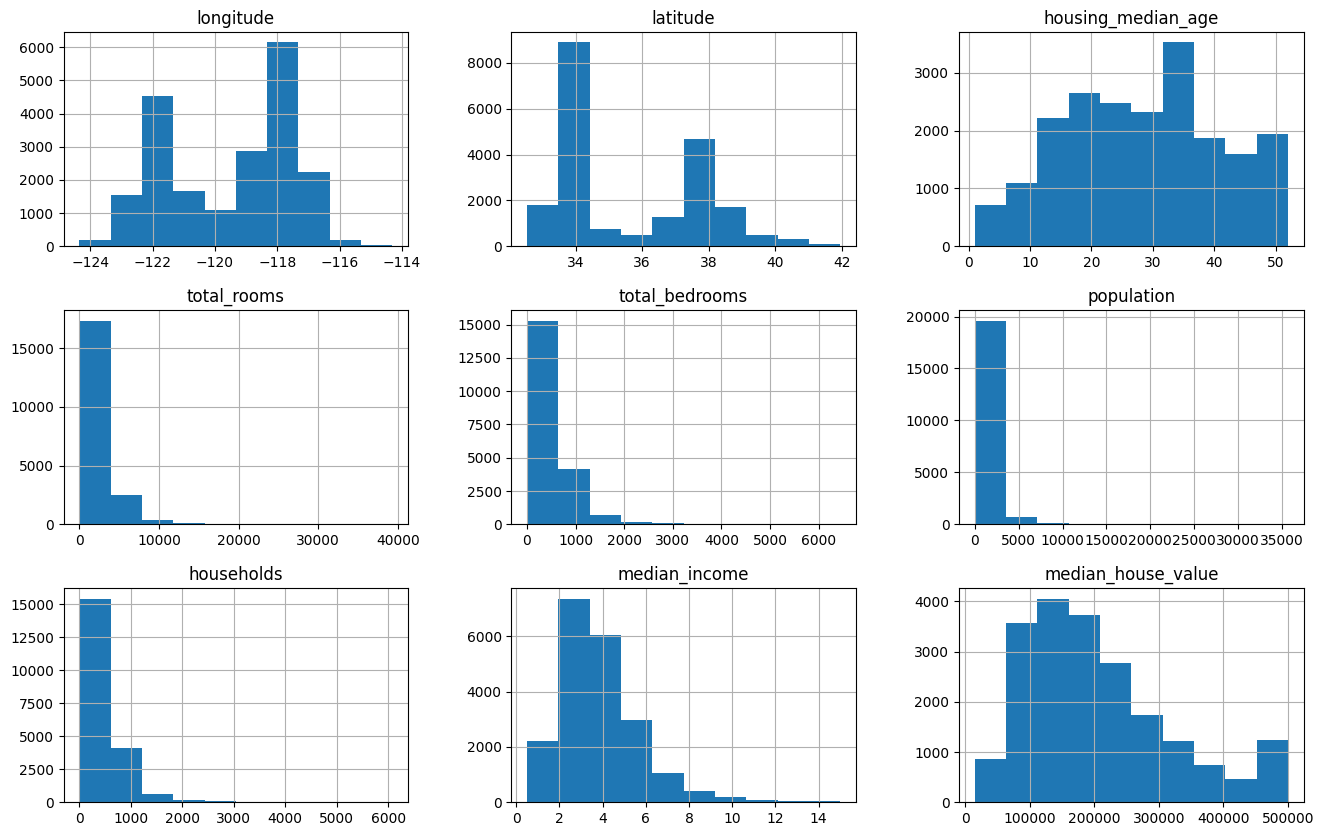

In [3]:
data.hist(figsize= (16,10))

<Axes: >

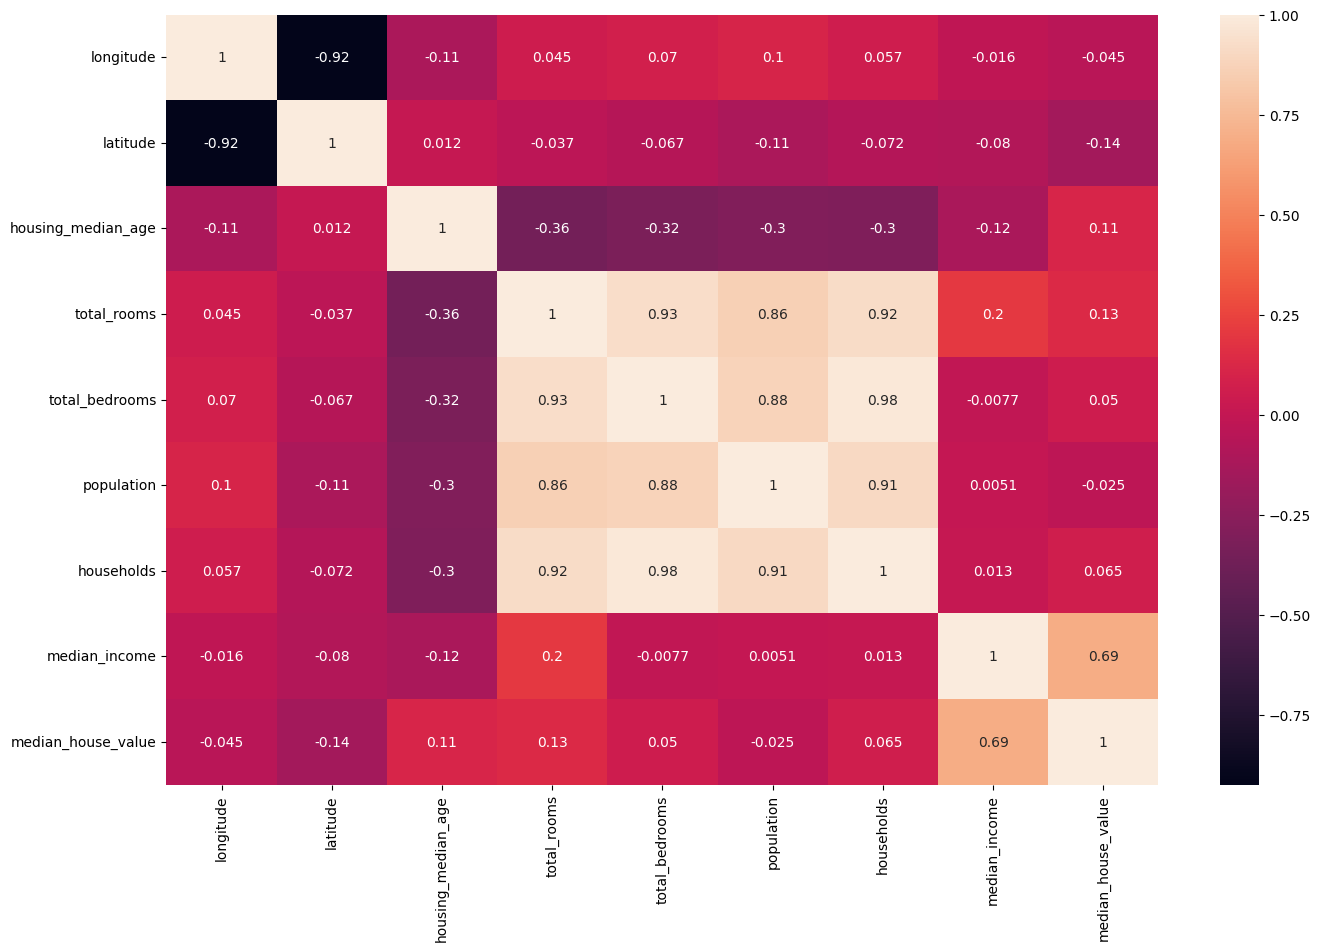

In [4]:
plt.figure(figsize=(16,10))
sns.heatmap(data.drop(['ocean_proximity'], axis=1).corr(), annot= True)

In [5]:
data = data.join(pd.get_dummies(data.ocean_proximity).astype(int)).drop(['ocean_proximity'], axis= 1)

In [6]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


<Axes: >

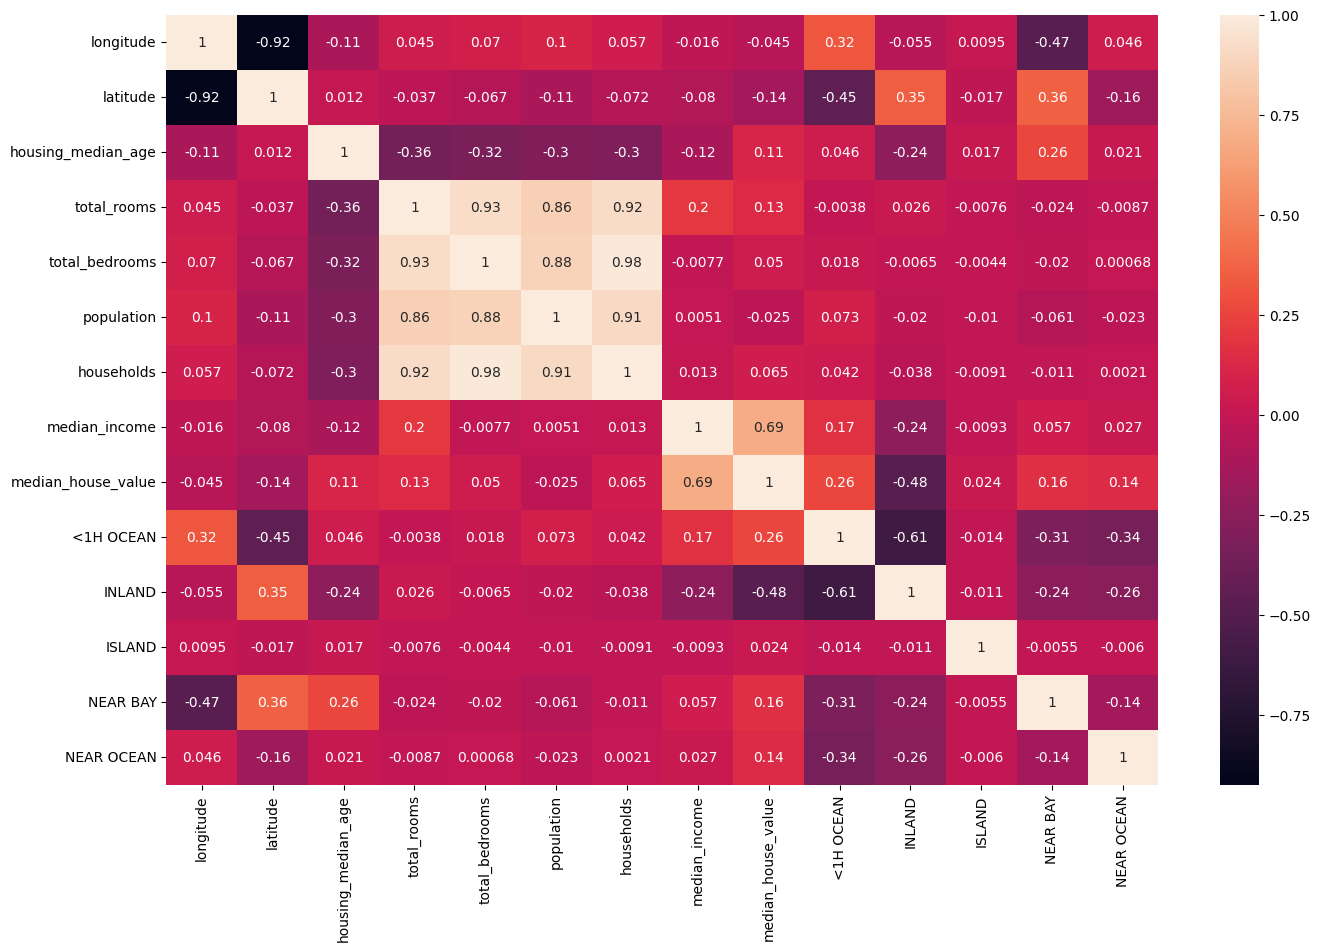

In [7]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(), annot= True)

<Axes: xlabel='latitude', ylabel='longitude'>

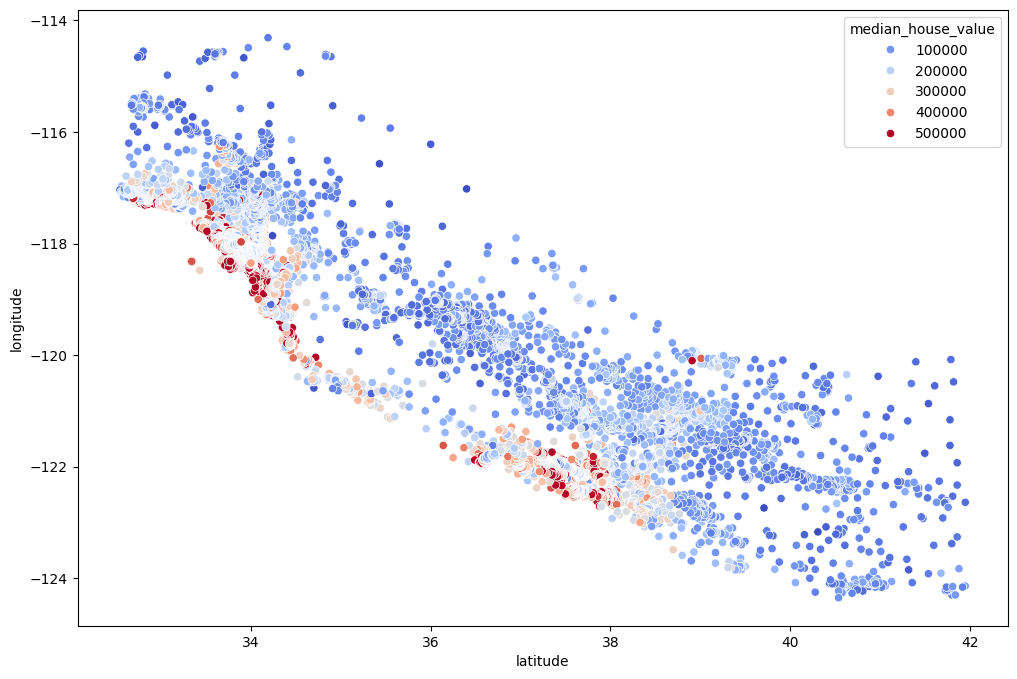

In [8]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='latitude', y='longitude', data= data, hue='median_house_value', palette='coolwarm')

In [10]:
x = data.drop(['median_house_value'], axis= 1)
y = data['median_house_value']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2)
train_data = x_train.join(y_train)
test_data = x_test.join(y_test)

In [11]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
14677,-117.11,32.84,16.0,4608.0,629.0,2020.0,636.0,6.0400,1,0,0,0,0,243000.0
18468,-121.61,37.15,16.0,5498.0,729.0,2051.0,694.0,7.8601,1,0,0,0,0,416300.0
928,-122.03,37.55,22.0,9167.0,1373.0,4319.0,1404.0,6.9920,0,0,0,1,0,284800.0
4027,-118.55,34.18,32.0,3011.0,529.0,1287.0,525.0,5.0605,1,0,0,0,0,311000.0
275,-122.18,37.79,41.0,1411.0,233.0,626.0,214.0,7.0875,0,0,0,1,0,240700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6927,-118.07,34.00,42.0,1392.0,351.0,1471.0,348.0,2.6300,1,0,0,0,0,143800.0
263,-122.20,37.77,43.0,2430.0,502.0,1537.0,484.0,2.8980,0,0,0,1,0,121400.0
17818,-121.90,37.40,16.0,2998.0,603.0,1606.0,615.0,3.7622,1,0,0,0,0,150000.0
5808,-118.26,34.14,6.0,1727.0,506.0,1200.0,439.0,4.1083,1,0,0,0,0,210700.0


In [17]:
reg.fit(x_train,y_train)
reg.score(x_test,y_test)

0.6429349711336576

# Using Random Forest Regression

In [19]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()

In [20]:
forest.fit(x_train,y_train)
forest.score(x_test,y_test)

0.8177241306228089